# Housing Prices Project (module 70)

## Business Questions

1:
- classification task (predicting whether a house is expensive or not)
- and later move on to the regression task (predicting the exact price).

2:
- Create a Pipeline with your transformers and your model.-  Use GridSearchCV to find the best parameters for your model


## Workflow
- understand the context
- explore and clean the data
- data preprocessing
- modelling
- debugging
- implement solution

2: pipeline workflow:
- Initialize all the transformers / estimators you want to have in your pipeline, with their appropriate parameters.
- Create a pipeline by chaining the transformers / estimators together
- Fit the pipeline to the training data
- Use your fitted pipeline to make predictions from raw data.

## rem
Unit of measurement is feet


## Understanding Housing
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

# Imports and Settings

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [2]:
# import data
data = pd.read_table("data/housing_iteration_0_2_classification.csv", sep=",")

# Preprocessing

## Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [4]:
data.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000


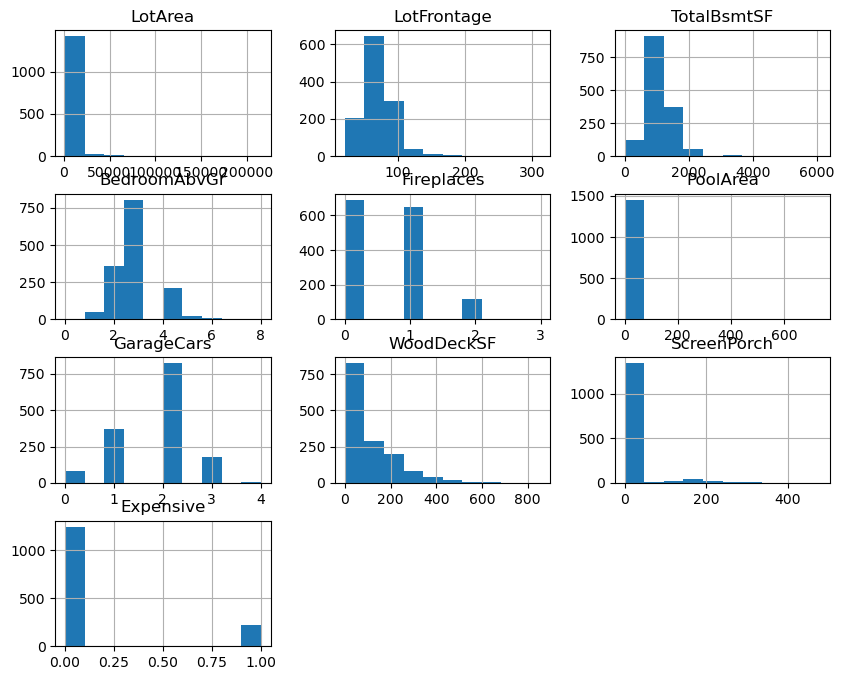

In [5]:
data.hist(figsize=(10, 8));

In [6]:
# column correlation
data.corr()["Expensive"].sort_values(ascending=False)
# Brett: "correlation does not equal causation". Still interesting ;)

Expensive       1.000000
TotalBsmtSF     0.467167
GarageCars      0.460152
Fireplaces      0.343523
LotFrontage     0.269355
WoodDeckSF      0.259138
LotArea         0.207233
BedroomAbvGr    0.075514
ScreenPorch     0.069669
PoolArea        0.033286
Name: Expensive, dtype: float64

In [7]:
# data = data.drop(["BedroomAbvGr", "ScreenPorch", "PoolArea"], axis=1)
# data.head(2)

## Defining X and y

In [8]:
# delete data with NaNs in "intended y column"
data.dropna(subset=["Expensive"], inplace=True)

In [9]:
y = data.pop("Expensive")
X = data
X.head(2)    # after .pop data has lost the y feature

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0


In [10]:
X = X.select_dtypes(include="number")

## Data Splitting (train & test)

In [11]:
# -----------> INPUTS  <------------
seed = 123
split = 0.2 # portion of the test sample of the whole dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=seed)
X_train.head(4)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,9900,90.0,1347,4,1,0,3,340,0
580,14585,NaN,1144,3,2,0,2,216,0
961,12227,NaN,1330,4,1,0,2,550,0
78,10778,72.0,1768,4,0,0,0,0,0


## Data Cleaning

In [13]:
# check for duplicates
duplicates = X_train.duplicated()
duplicated_rows = X_train[duplicates]
duplicated_rows

# X_train.drop_duplicates(inplace=True)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1090,8544,60.0,0,2,0,0,2,0,0
690,4426,NaN,848,1,1,0,2,149,0
1412,7200,60.0,0,2,0,0,2,0,0
430,1680,21.0,483,2,0,0,1,0,0
1088,2522,24.0,970,3,0,0,2,0,0
593,4435,NaN,848,1,0,0,2,140,0
193,2522,24.0,970,3,0,0,2,0,0
837,1680,21.0,483,2,0,0,1,0,0


In [14]:
# check for NaNs
X_train.isna().sum()

LotArea           0
LotFrontage     189
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

### Simple Imputer for NaNs

In [15]:
# Initialize and fit
imp = SimpleImputer().set_output(transform='pandas')
imp.fit(X_train)

SimpleImputer()

In [16]:
# Transform and check
X_imp_train = imp.transform(X_train)
X_imp_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

# Modelling (Taining the Model)

## Initialize Model

In [17]:
# 2. initialize the model (optional: give some parameters) ...and with pruning methods
# DTC = DecisionTreeClassifier()
DTC = DecisionTreeClassifier(max_depth=3, random_state=seed)          # max_depth parameter controls the maximum levels/depth of the decision tree
# DTC = DecisionTreeClassifier(min_samples_leaf=20, random_state=seed)   # min_sample_leaf sets a minimum number of samples/values that a leaf node must have

# 3. fit the model to the train data
DTC.fit(X=X_imp_train, y=y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [18]:
DTC.feature_names_in_

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch'], dtype=object)

In [19]:
DTC.feature_importances_

array([0.0155921 , 0.        , 0.16170002, 0.        , 0.15748987,
       0.        , 0.6327288 , 0.03248921, 0.        ])

In [20]:
# Expensive       1.000000
# TotalBsmtSF     0.467167
# GarageCars      0.460152
# Fireplaces      0.343523
# LotFrontage     0.269355
# WoodDeckSF      0.259138
# LotArea         0.207233
# BedroomAbvGr    0.075514
# ScreenPorch     0.069669
# PoolArea        0.033286

### Plotting Decision Tree

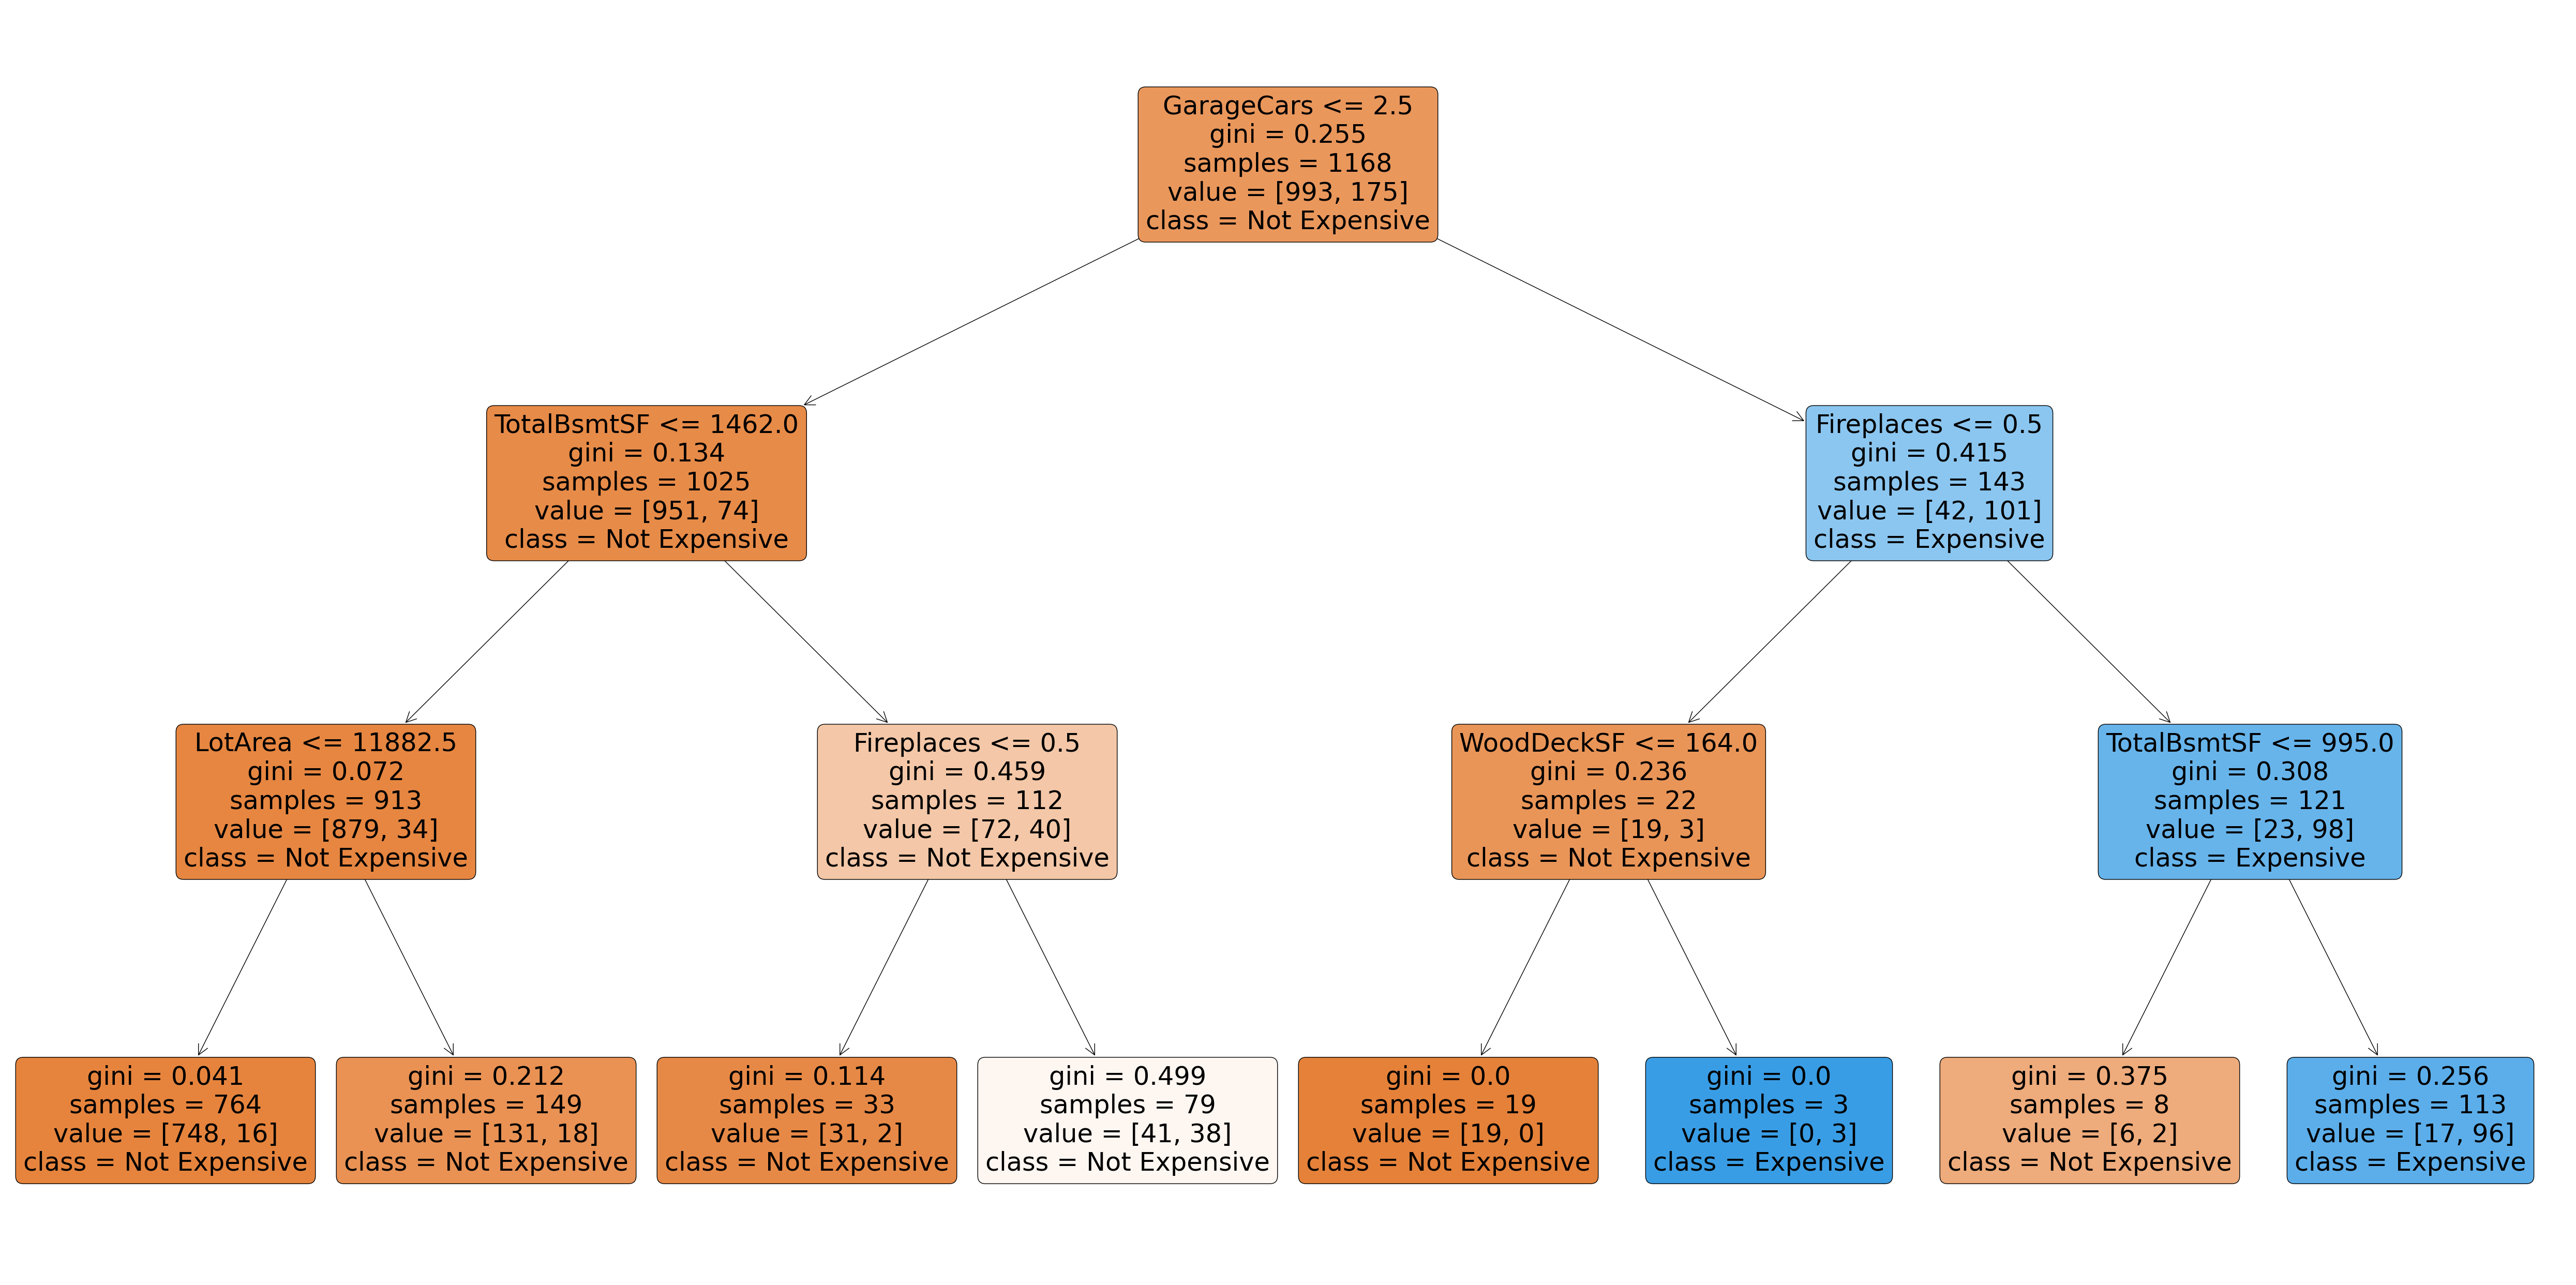

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     DTC,
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names=X_train.columns
     );

## Train_Prediction

In [22]:
train_pred = DTC.predict(X_imp_train)

## Train_Accuracy

In [23]:
# from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_true = y_train,
               y_pred = train_pred
              )

# Evaluation (Testing the Model)

In [24]:
# for testing, the imputer must neither be initialized(.init) nor fitted (.fit)!!
X_test = imp.transform(X_test)
X_test.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

## Test_Prediction

In [25]:
# with DTC Model
test_pred = DTC.predict(X_test)

## Test_Accuracy

In [26]:
# accuracy prediction
test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = test_pred
                                 )
round(test_accuracy, 2)

0.92

In [27]:
delta= train_accuracy - test_accuracy
print(train_accuracy, "---", test_accuracy, "---", delta)

0.9203767123287672 --- 0.9212328767123288 --- -0.0008561643835616195


# Pipeline

In [28]:
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

## Set up Pipeline

In [29]:
# 1. initialize transformers and model
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
dtree = DecisionTreeClassifier(max_depth=6)

In [30]:
# 2. Create and fit a pipeline
pipe = make_pipeline(imputer, scaler, dtree)
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6))])

In [31]:
# 3. Use the pipeline to make predictions
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

## Cross Validation with sk-learn transformer GridSearchCV

### Create Params Grid -----> INPUT

In [32]:
# to use crossValidation we need to pass parameters. this is done in a param_grid
# Attention: use double __
param_grid = {
    'simpleimputer__strategy':['mean', 'median'],
    'standardscaler__with_mean':[True,False],
    'standardscaler__with_std':[True,False],
    'decisiontreeclassifier__max_depth': range(3, 12, 2),
    'decisiontreeclassifier__min_samples_leaf': range(5, 15, 2),
    'decisiontreeclassifier__min_samples_split': range(10, 50, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

In [33]:
# initialize cross validation
# The Cross Validation then takes as arguments your model (or pipeline!) and the parameter grid, among some others:
GSCV = GridSearchCV(pipe, # pipeline or model
                      param_grid, # your parameter grid
                      cv=10, # the value for K in K-fold Cross Validation
                      refit=True, # Refit an estimator using the best found parameters on the whole dataset, by default is set to True
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process
CV = GSCV

# search = RandomizedSearchCV()
# RSCV = RandomizedSearchCV(pipe,
#                       param_grid,
#                       cv=5,
#                       refit=True,
#                       scoring='accuracy',
#                       verbose=1)
# CV = RSCV

In [34]:
CV.fit(X_train, y_train)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=6))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(3, 12, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(5, 15, 2),
                         'decisiontreeclassifier__min_samples_split': range(10, 50, 5),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy', verbose=1)

In [35]:
CV.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 35,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [36]:
# the mean cross-validated score of the best estimator
CV.best_score_

0.9246610669024463

## Using Pipeline

In [37]:
# training accuracy
y_train_pred = CV.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

In [38]:
# testing accuracy
y_test_pred = CV.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [39]:
Delta = train_acc - test_acc
print(Delta, train_acc, test_acc)

0.005136986301369828 0.9332191780821918 0.928082191780822


### Plotting Decision Tree (with CV)

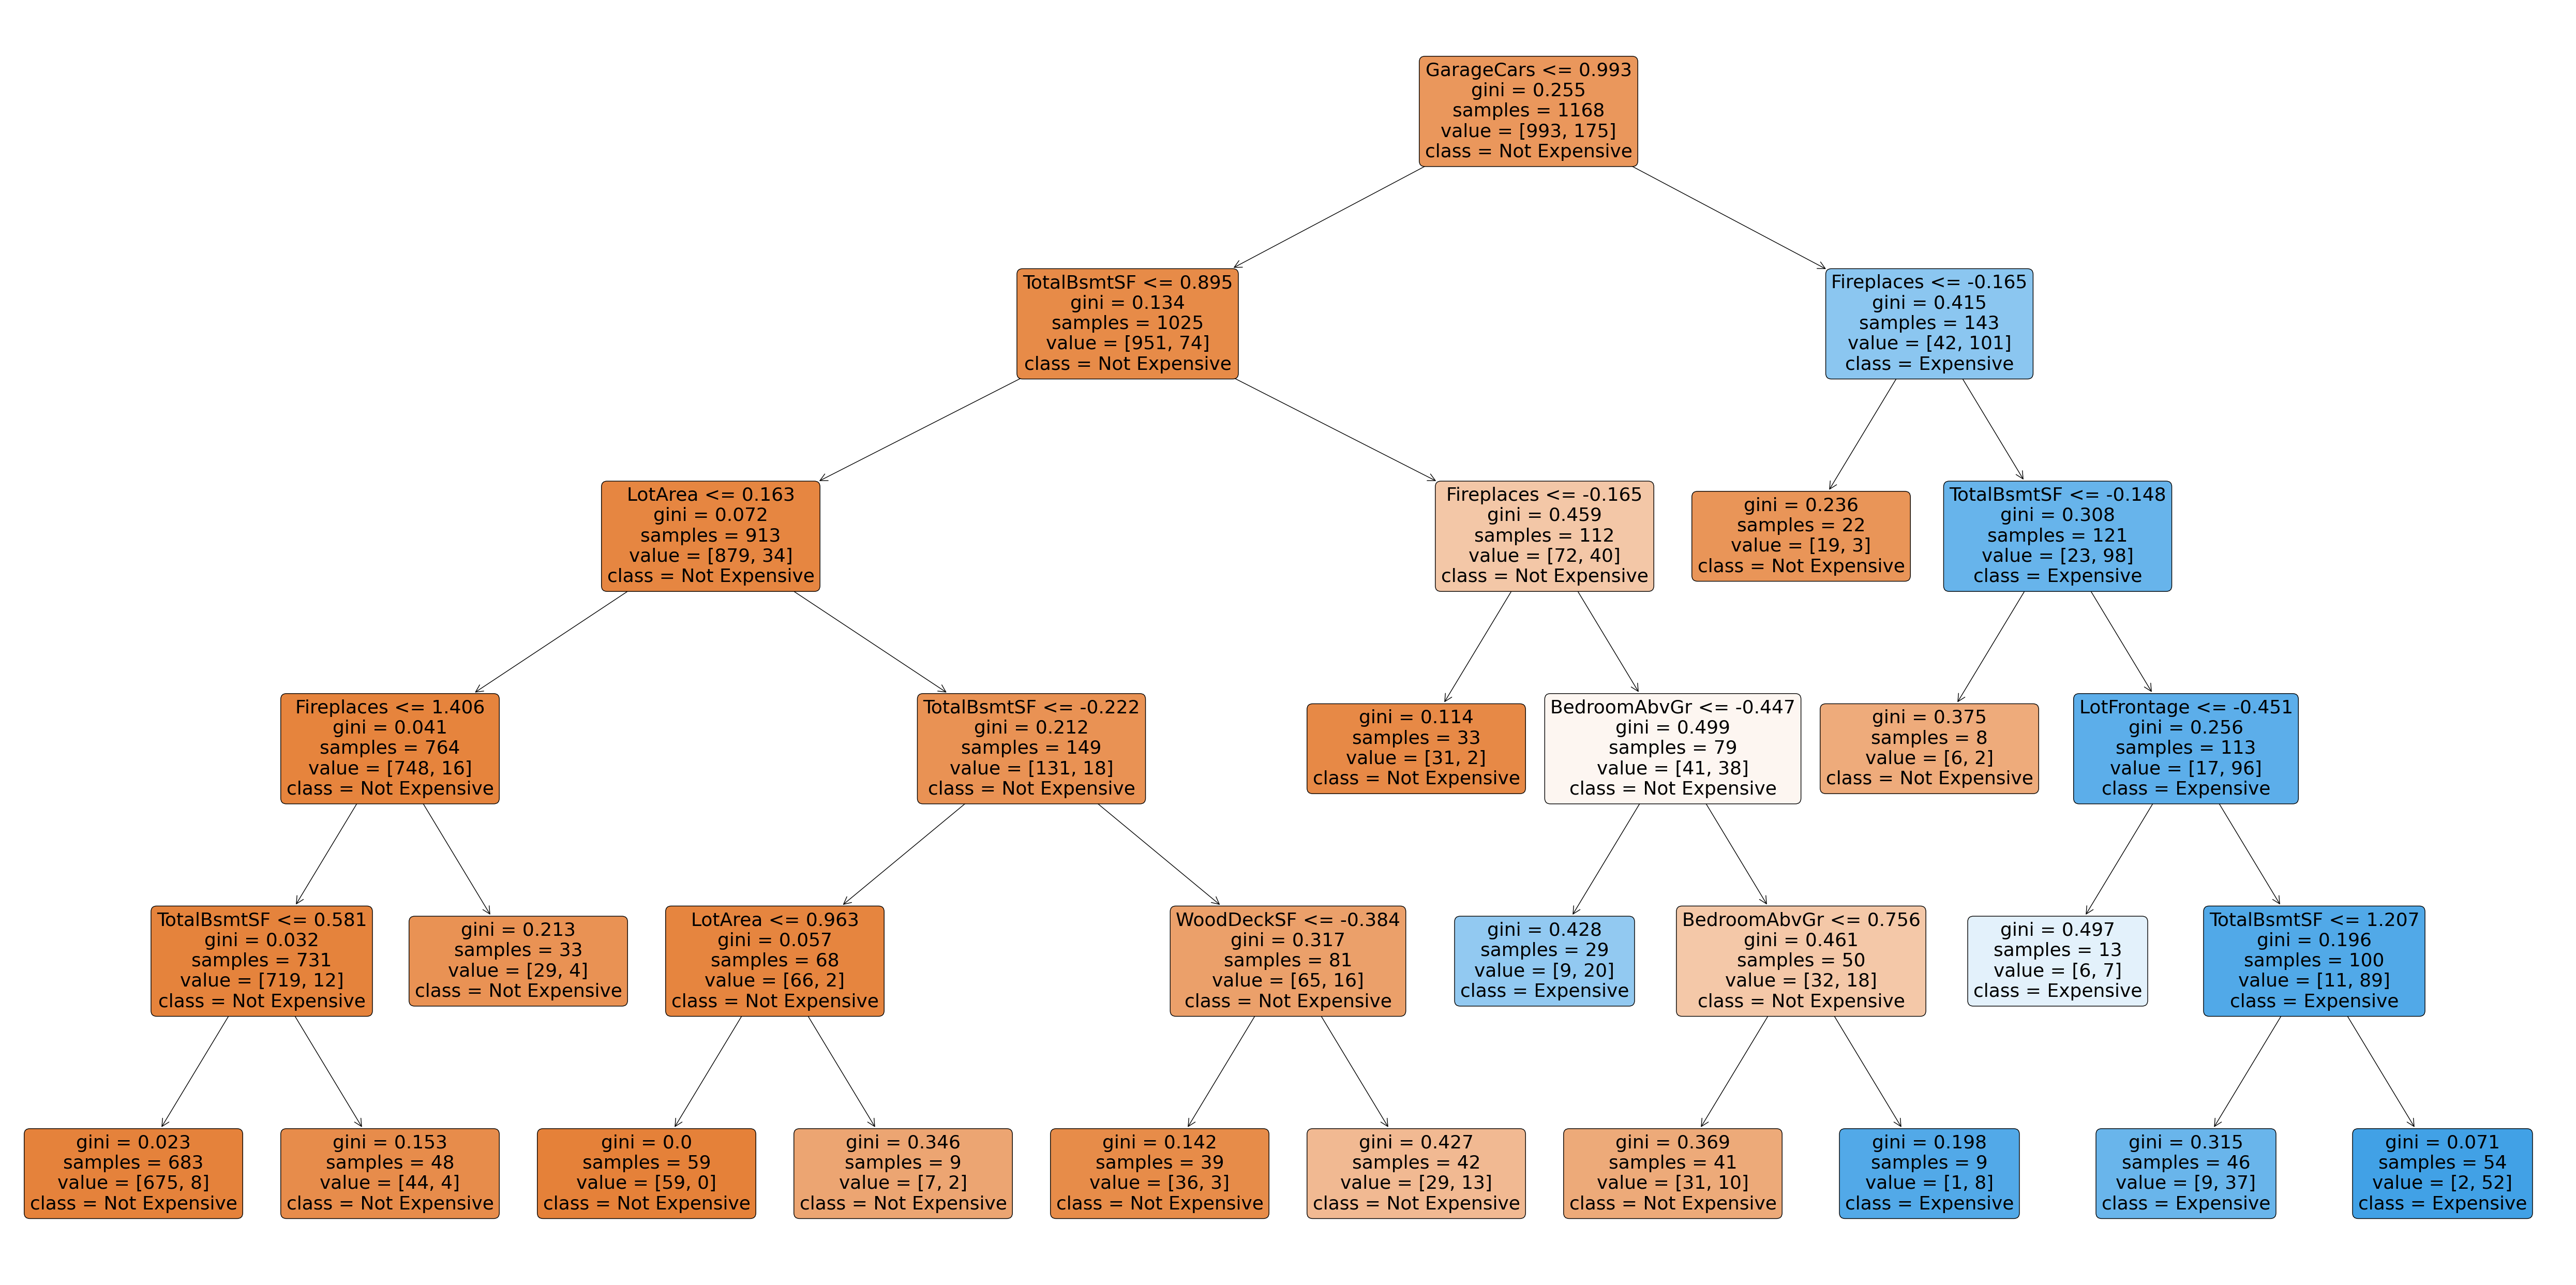

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     CV.best_estimator_['decisiontreeclassifier'],  # instead of model, here: CV
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names=X_train.columns
     );